# Use xraydb python database to estimate absorption coefficient (https://xraypy.github.io/XrayDB/python.html)
## using the code below compare absortion coefficient value of Fe at 20keV and 60keV

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xraydb

# material and energy definition : energy is in eV
Material='Fe'
Energy=20000  # in eV

# compute mu value with xraydb in cm-1
muFe20=xraydb.material_mu(Material,Energy)
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
print('mu (cm-1) = ', muFe20)


# Use xraydb python database to estimate absorption coefficient
## using the code below plot the linear absorption coefficient as a function of energy for Fe between 10keV and 200keV

Text(0.5, 1.0, 'Material = Fe ')

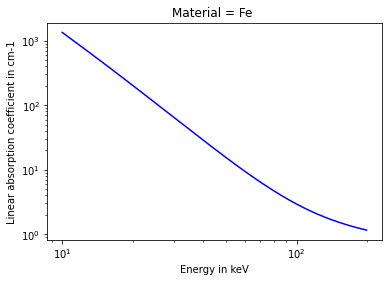

In [10]:
# material 
Material='Fe'

# Energy range 10keV to 100keV
Emin=10000.0
Emax=200000.0
Estep = 1000.0
Energy_range=np.arange (Emin,Emax,Estep)

# compute transmission for a specific thickness using Beer Lambert Law for various energies
mu=xraydb.material_mu(Material,Energy_range)

# plot transmission coefficient vs energy
plt.figure(1)

plt.loglog(Energy_range/1000,mu,'b-')   
plt.xlabel('Energy in keV')
plt.ylabel('Linear absorption coefficient in cm-1')
title='Material = %s ' %(Material)
plt.title(title)


# Use xraydb python database to estimate delta coefficient
## using the code below plot the delta and beta value as a function of energy for Fe between 10keV and 200keV and also delta/beta

Text(0.5, 1.0, 'Material = Fe ')

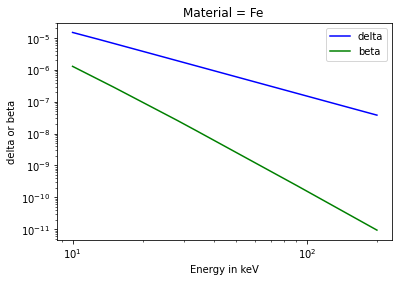

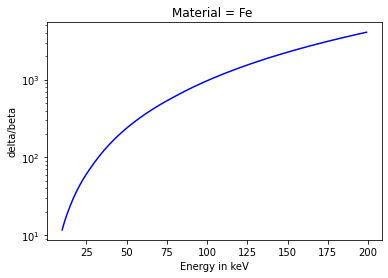

In [20]:
# material 
Material='Fe'
density=7.8 # g/cm3

# Energy range 10keV to 100keV
Emin=10000.0
Emax=200000.0
Estep = 1000.0
Energy_range=np.arange (Emin,Emax,Estep)

# compute transmission for a specific thickness using Beer Lambert Law for various energies
info = xraydb.xray_delta_beta(Material, density, Energy_range)
delta=info[0]
beta=info[1]

# plot transmission coefficient vs energy
plt.figure(1)
plt.loglog(Energy_range/1000,delta,'b-',label='delta')   
plt.loglog(Energy_range/1000,beta,'g-',label='beta') 
plt.xlabel('Energy in keV')
plt.ylabel('delta or beta')
title='Material = %s ' %(Material)
plt.legend(loc='best')
plt.title(title)


# plot transmission coefficient vs energy
plt.figure(2)
plt.semilogy(Energy_range/1000,delta/beta,'b-')   
plt.xlabel('Energy in keV')
plt.ylabel('delta/beta')
title='Material = %s ' %(Material)
plt.title(title)

# Use xraydb python database to estimate transmission for a fixed energy
## Compute transmission for a specific thickness using Beer Lambert Law for Fe at 20keV and 60keV. Knowing that tomography requires at least 0.2 transmission which energy is best to use between 20keV and 60 keV

In [3]:
# material and energy definition : energy is in eV
Material='Fe'
Energy=20000  # in eV

# compute mu value with xraydb in cm-1
muFe20=xraydb.material_mu(Material,Energy)

# thickness
t=0.1 # in cm

#compute transmission using Beer Lambert law
transmission=np.exp(-muFe20*t)
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
info ='transmission for (%f cm) = %e' %(t,transmission)
print(info)



Material  Fe
Energy in keV =  20.0
transmission for (0.100000 cm) = 1.624246e-09


# Use xraydb python database to estimate transmission for an energy range
## What minimum energy is required for a transmission of 0.2 in the case of Fe with 0.1 cm trhickness

Text(0.5, 1.0, 'Material = Fe / thickness = 0.1000 cm')

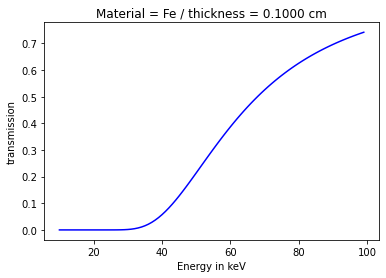

In [6]:
plt.close('all')

# Material information
Material='Fe'
thickness=0.1 # in cm

# Energy range 10keV to 100keV
Emin=10000.0
Emax=100000.0
Estep = 1000.0
Energy_range=np.arange (Emin,Emax,Estep)

# compute transmission for a specific thickness using Beer Lambert Law for various energies
mu=xraydb.material_mu(Material,Energy_range)
trans=np.exp(-mu*thickness)

# plot transmission coefficient vs energy
plt.figure(1)

plt.plot(Energy_range/1000,trans,'b-')   
plt.xlabel('Energy in keV')
plt.ylabel('transmission')
title='Material = %s / thickness = %0.4f cm' %(Material,t)
plt.title(title)


# Use xraydb python database to estimate transmission for a fixed energy and varying thickness (from 0.1 to 1 cm) at a specific energy
## 

(0.01, 1)

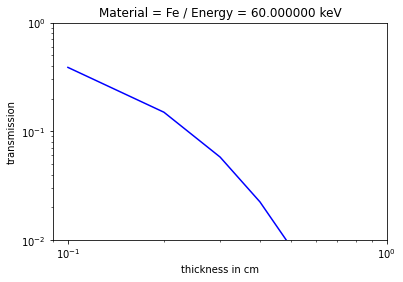

In [7]:
plt.close('all')

# Material information
Material='Fe'

# thickness range 0.1 to 1 cm
tmin=0.1
tmax=1.
tstep = 0.1
t_range=np.arange (tmin,tmax,tstep)

#Energy fied to 60 keV
Energy=60000.

# compute absorption coefficient for a fixed energy
mu=xraydb.material_mu(Material,Energy)

# compute transmission for a specific energy using Beer Lambert Law for various thicknesses
trans=np.exp(-mu*t_range)

# plot transmission coefficient vs energy
plt.figure(1)

plt.loglog(t_range,trans,'b-')   
plt.xlabel('thickness in cm')
plt.ylabel('transmission')
title='Material = %s / Energy = %f keV' %(Material,Energy/1000)
plt.title(title)
plt.ylim(0.01,1)
